In [ ]:
 from scipy.integrate import quad, dblquad, tplquad
from scipy.misc import derivative as spderiv
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
def forward(f, x, h):
    return (f(x+h)-f(x))/h

def central(f, x, h):
    return (f(x+h/2)-f(x-h/2))/h

def central_richardson(f, x, h):
    return central(f,x,h/2) + (1/3)*(central(f,x,h/2)-central(f,x,h))

In [ ]:
def lanczos(f,x,h):

  return (3/(2*pow(h,3)))*quad(lambda t: t*f(x+t),-h, h)[0]

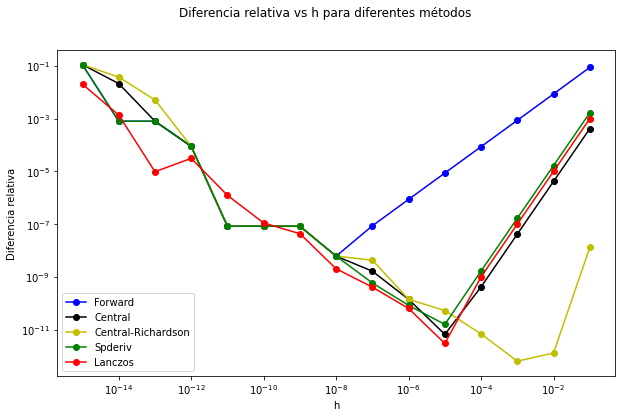

In [ ]:
def compare_derivatives():

    f = np.sin
    fp = np.cos
    n = 15

    h = np.power(10.0, np.arange(-n, 0, +1))
    x = np.pi/3

    fig,ax = plt.subplots(figsize=(10, 6))
    fig.suptitle("Diferencia relativa vs h para diferentes métodos ")

    yf = [ np.abs((forward(f,x,h[i])/fp(x))-1) for i in range(0,n)]
    yc = [ np.abs((central(f,x,h[i])/fp(x))-1) for i in range(0,n)]
    yr = [ np.abs((central_richardson(f,x,h[i])/fp(x))-1) for i in range(0,n)]
    ysc = [ np.abs((spderiv(f,x,h[i])/fp(x))-1) for i in range(0,n)]
    yla =  [ np.abs((lanczos(f,x,h[i])/fp(x))-1) for i in range(0,n)]

    ax.plot(h,yf,"bo-", label = "Forward")
    ax.plot(h,yc, "ko-", label = "Central")
    ax.plot(h,yr, "yo-", label = "Central-Richardson")
    ax.plot(h,ysc, "go-", label = "Spderiv")
    ax.plot(h,yla, "ro-", label = "Lanczos")

    ax.legend(loc=3)

    plt.xlabel("h")
    plt.ylabel('Diferencia relativa')

    plt.xscale("log")
    plt.yscale("log")

    plt.savefig("ImagenP1.pdf")

compare_derivatives()

In [ ]:

"""
Intento N°1: Porque no funciona?

f = np.sin
fp = np.cos
n = 15
h = np.power(10.0, np.arange(-n, 0, +1))
xv =  np.linspace(0, np.pi/2, n+1)

ycr = [ [abs((central_richardson(f,xv[j],h[i])/fp(xv[j]))-1) for j in range(0,n)] for i in range(0,n)]
Aycr = np.array(ycr)

#print(Aycr)#ycr)

#plt.imshow(Aycr)#ycr)
"""

'\nIntento N°1: Porque no funciona?\n\nf = np.sin\nfp = np.cos\nn = 15\nh = np.power(10.0, np.arange(-n, 0, +1))\nxv =  np.linspace(0, np.pi/2, n+1)\n\nycr = [ [abs((central_richardson(f,xv[j],h[i])/fp(xv[j]))-1) for j in range(0,n)] for i in range(0,n)]\nAycr = np.array(ycr)\n\n#print(Aycr)#ycr)\n\n#plt.imshow(Aycr)#ycr)\n'

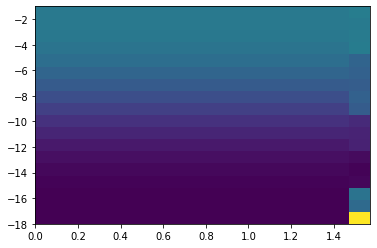

In [ ]:

f = np.sin
fp = np.cos

n = 15
#h = np.power(10.0, np.arange(-n, 0, +1))
xv =  np.linspace(0, np.pi/2, n+1)

h = np.log10(np.logspace(-18, -1, 18))
#x = np.linspace(0, 1.1*np.pi/2, 100)

Xv, H = np.meshgrid(xv, h)
Z2 = np.abs(central_richardson(f,Xv, H)/fp(Xv)-1)

fig ,ax = plt.subplots()

"""im = ax.pcolormesh(Xv, H, Z2, norm=LogNorm(vmin=1.0e-12, vmax=1))
ax.set_xlabel(rf"$x$", fontsize=15)
ax.set_ylabel(rf"$h$", fontsize=15)
ax.ticklabel_format(axis='y', style='sci')"""
#ax.set_yscale('log')
#fig.colorbar(im)
#fig.savefig("derivs-imshow.pdf")

extent = np.min(xv), np.max(xv), np.min(h), np.max(h)
plt.imshow(Z2,extent=extent,aspect="auto")

